In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamond-price-prediciton-2024/train.csv
/kaggle/input/diamond-price-prediciton-2024/test.csv


# 1- Get the Data


In [3]:
train = pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/train.csv')
test = pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/test.csv')

# 2- Discover and visualize the data

Check the head of diamond(train - test), and check out its info() and describe() methods.

In [4]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [8]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
test.describe()

,Id,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,5394.500000,0.798279,61.758315,57.452531,5.729514,5.732559,3.539398
std,3114.371686,0.475700,1.421266,2.236933,1.123736,1.115090,0.695483
min,1.000000,0.200000,54.000000,50.000000,0.000000,0.000000,0.000000
25%,2697.750000,0.400000,61.100000,56.000000,4.720000,4.727500,2.910000
50%,5394.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,8091.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,10788.000000,4.500000,79.000000,73.000000,10.230000,10.160000,6.720000


## B- Data visualization

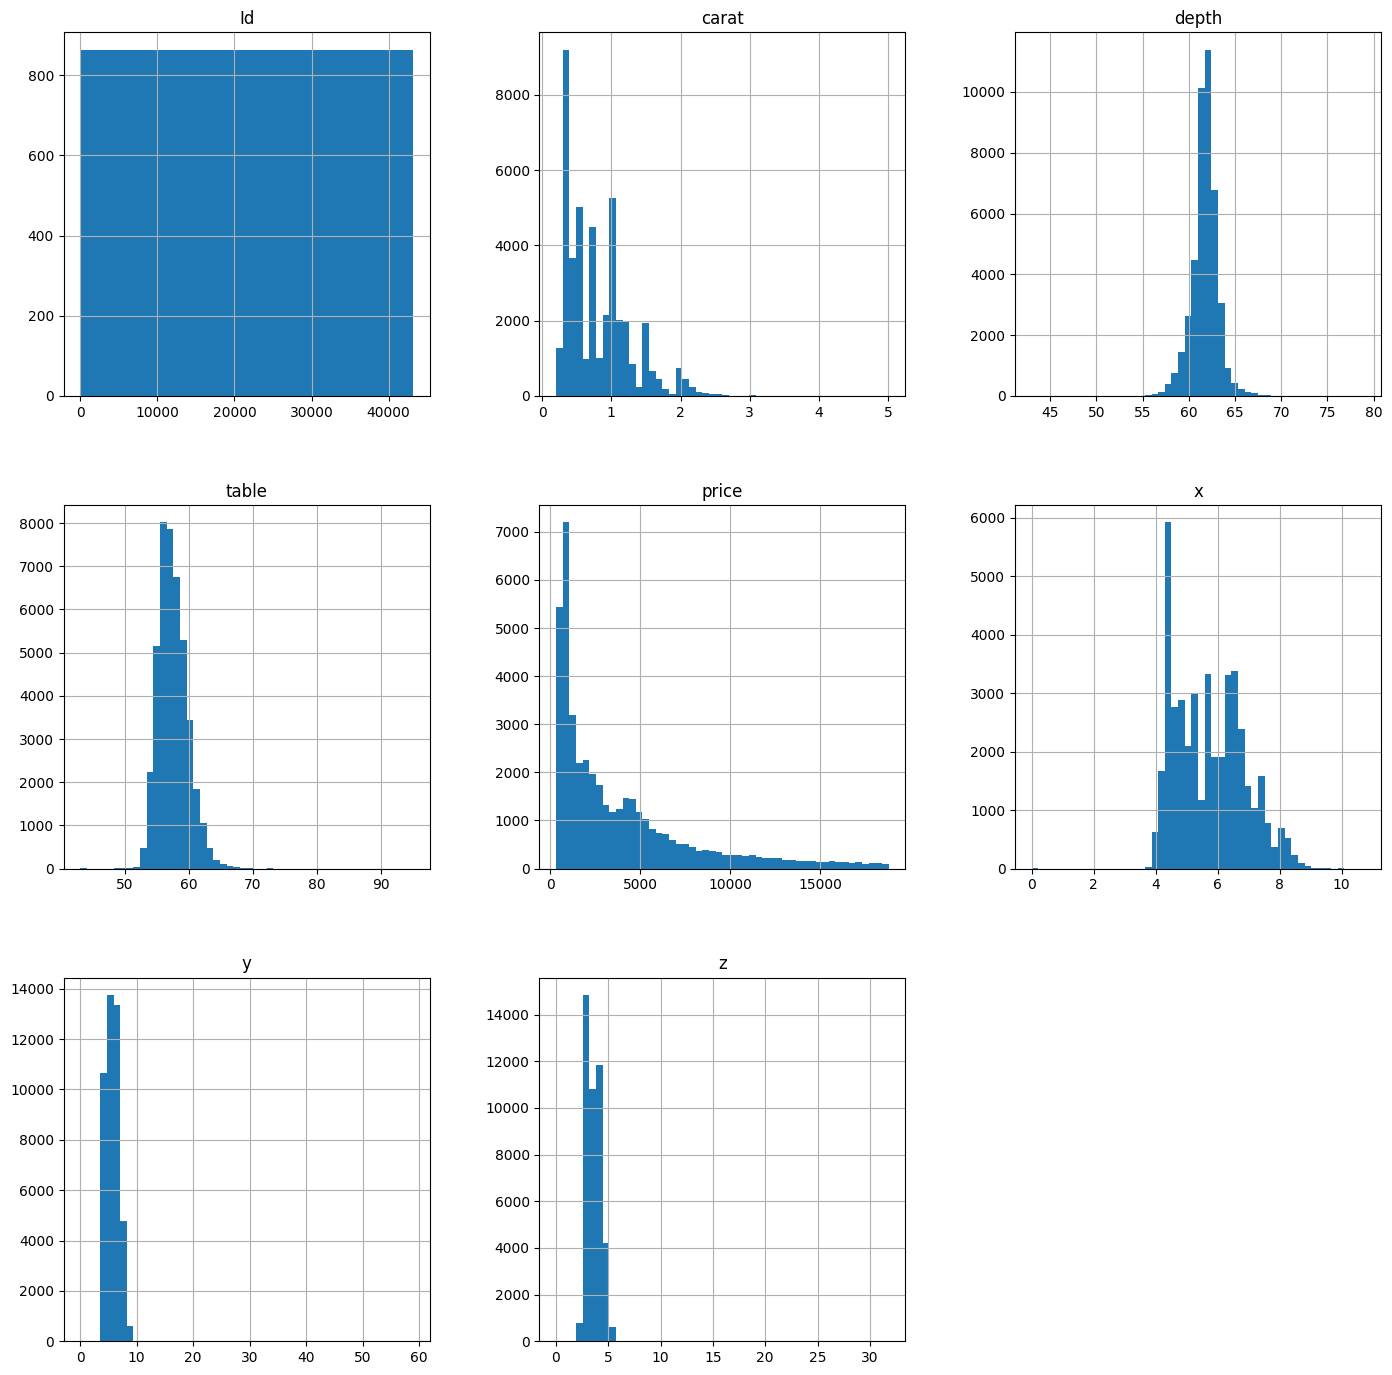

In [10]:
#ploting histogram on train dataset to get an idea of the features inside the data
train.hist(bins=50,figsize=(17,17))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

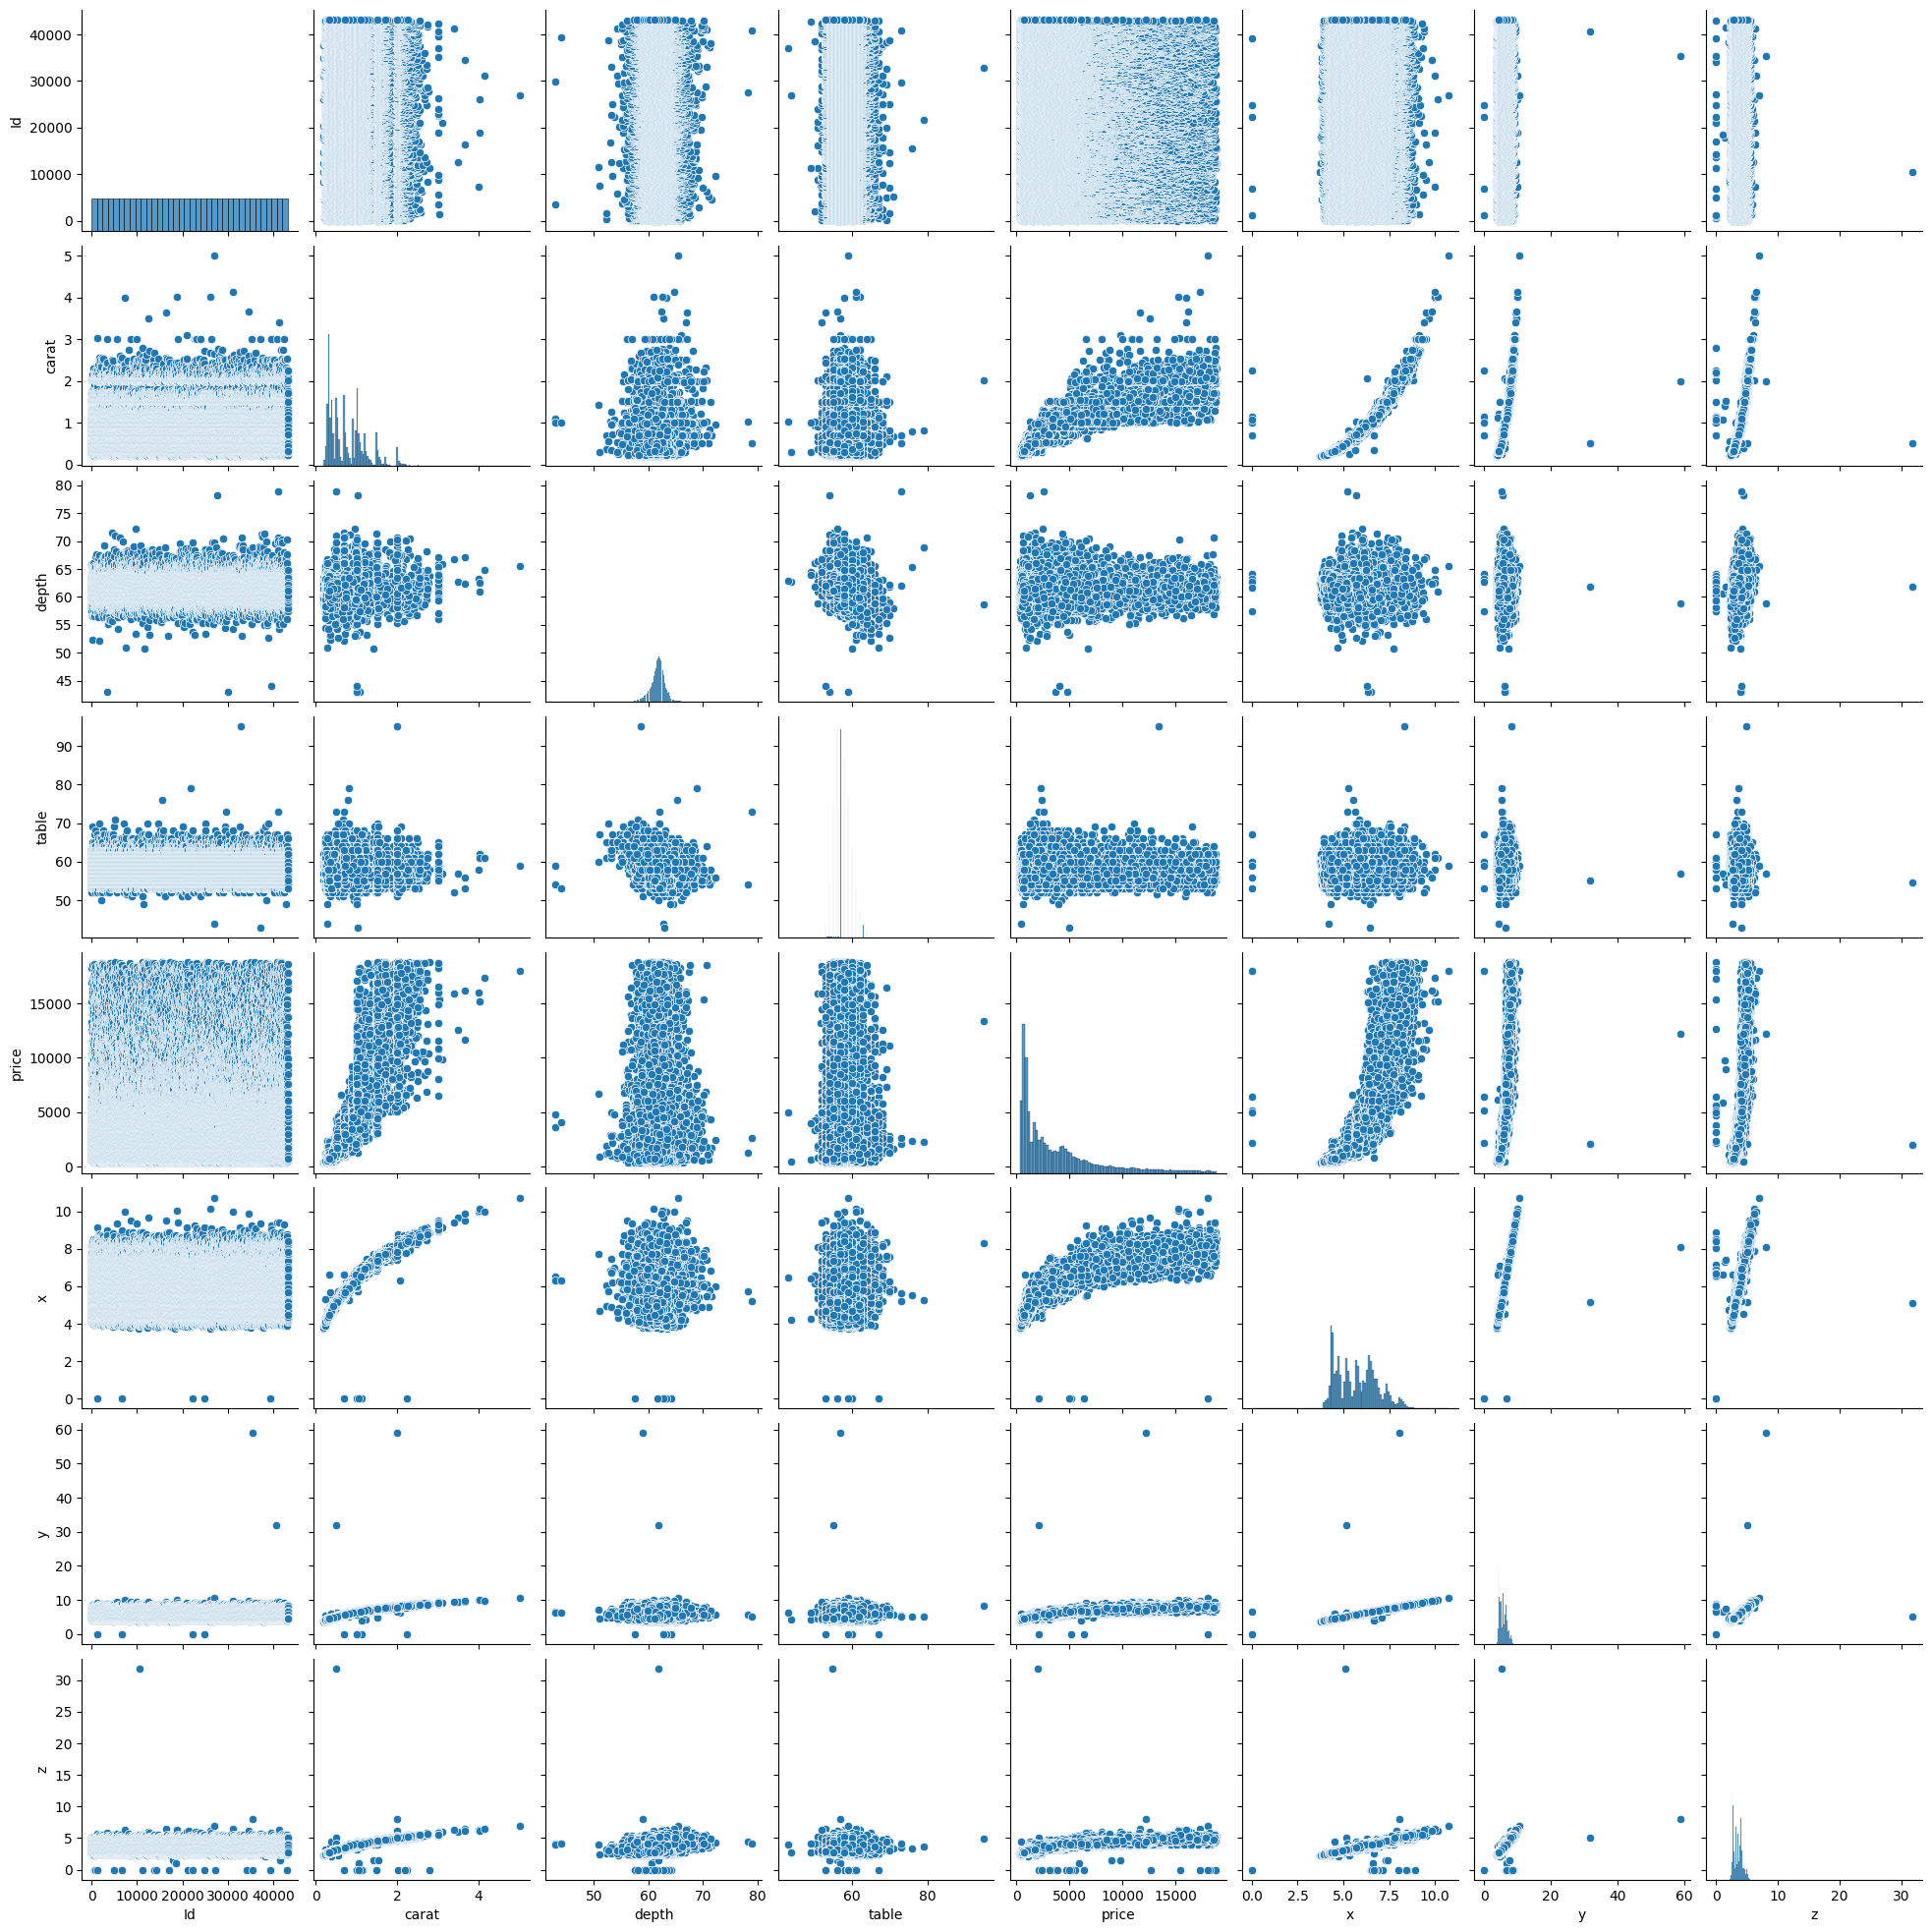

In [11]:
#Analysing train data by examaning a pairplot  
ax = sns.pairplot(train)

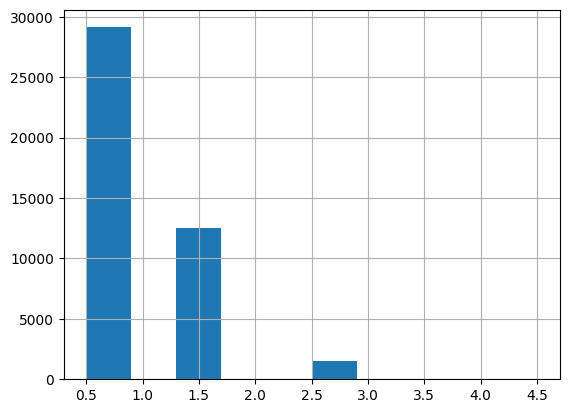

In [12]:
train["carat_cat"] = pd.cut(train["carat"], bins=[0, 1, 2, 3, 4, np.inf], labels=[0.5, 1.5, 2.5, 3.5, 4.5])
train["carat_cat"].hist()
train.drop('carat_cat',axis=1,inplace=True)

In [13]:
(len(train[train['carat'] > 3 ]) / len(train)) * 100

0.04866518353726362

Text(0.5, 1.0, 'carat by prices')

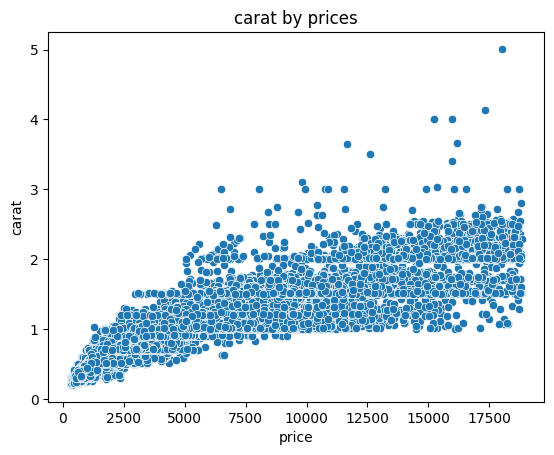

In [14]:
ax = sns.scatterplot(data = train, x = 'price', y = 'carat')
plt.title('carat by prices')

In [15]:
weight_price =train.groupby('carat')['price'].mean()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


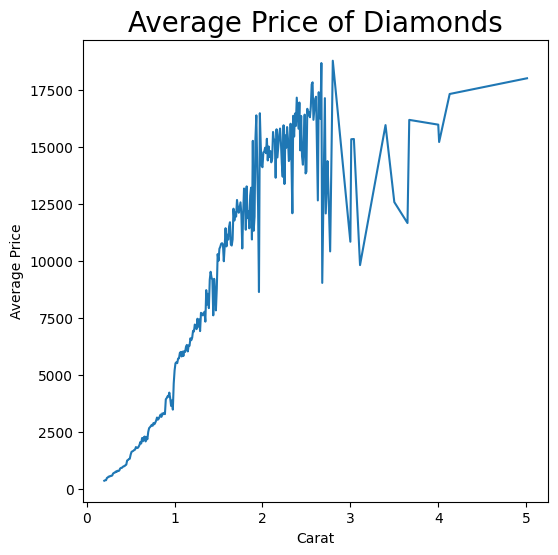

In [16]:
plt.figure(figsize=(6,6))
sns.lineplot(x=weight_price.index,y=weight_price.values)
plt.xlabel('Carat')
plt.ylabel('Average Price')
plt.title('Average Price of Diamonds', size=20);

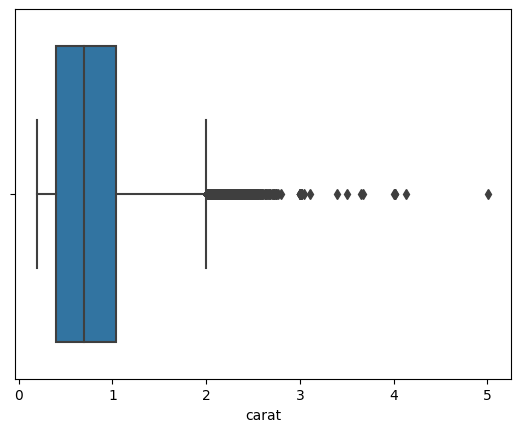

In [17]:
sns.boxplot(data = train ,x='carat')
plt.show()

In [18]:
(len(train[train['carat'] > 2 ]) / len(train)) * 100

3.4853540971449757

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

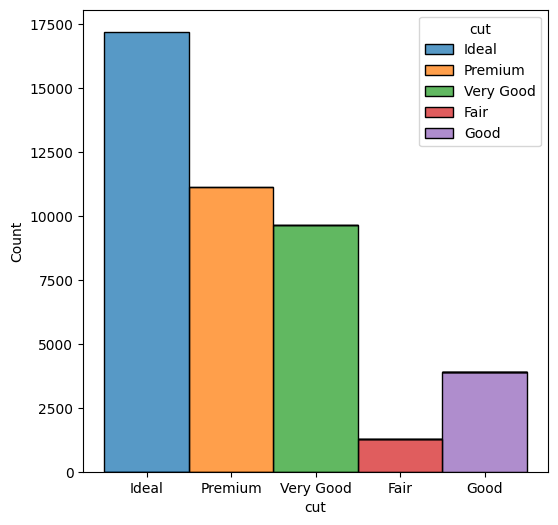

In [19]:
plt.figure(figsize = (6,6))
sns.histplot(data = train ,x = 'cut' , hue = 'cut' , multiple="stack")
plt.show()

In [20]:
train.cut.value_counts()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

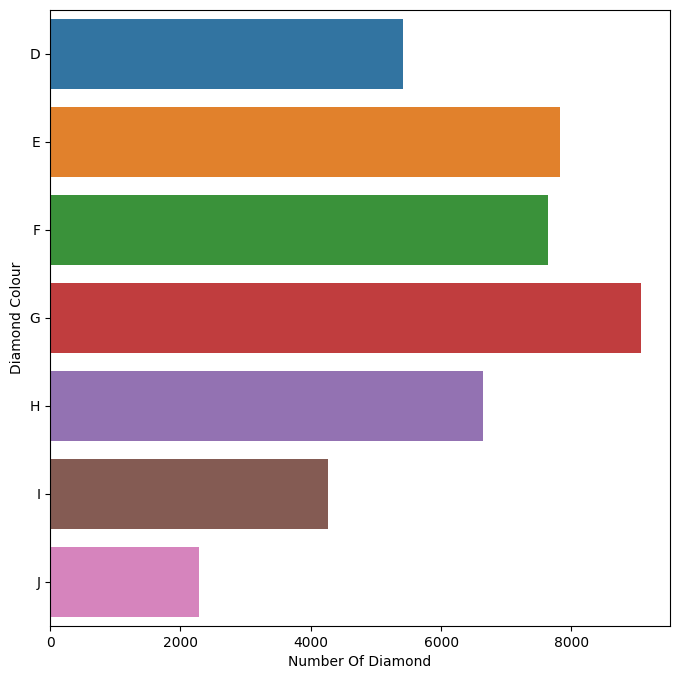

In [21]:
plt.figure(figsize=(8,8))
sns.barplot(x=train['color'].value_counts().values,y=train['color'].value_counts().index,order=['D','E','F','G','H','I','J'])
plt.ylabel('Diamond Colour')
plt.xlabel('Number Of Diamond');

In [22]:
train['color'].value_counts()

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

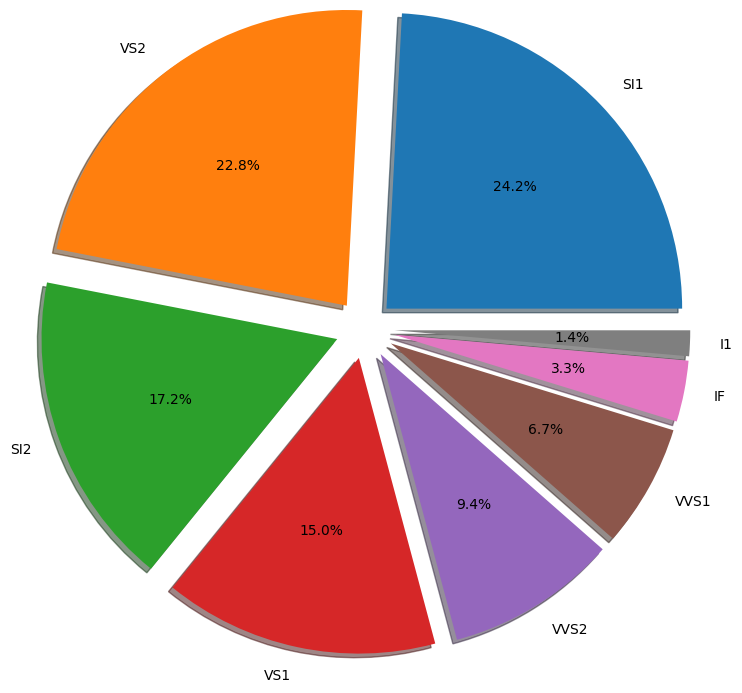

In [23]:
plt.pie(train['clarity'].value_counts().values, labels= train['clarity'].value_counts().index, explode= [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2],
        autopct='%1.1f%%', shadow=True, radius= 2)
plt.show() 

In [24]:
train['clarity'].value_counts()

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64

In [25]:
px.histogram(train, x='clarity',y='price', barmode='group',title="Total Price of each Clarity")

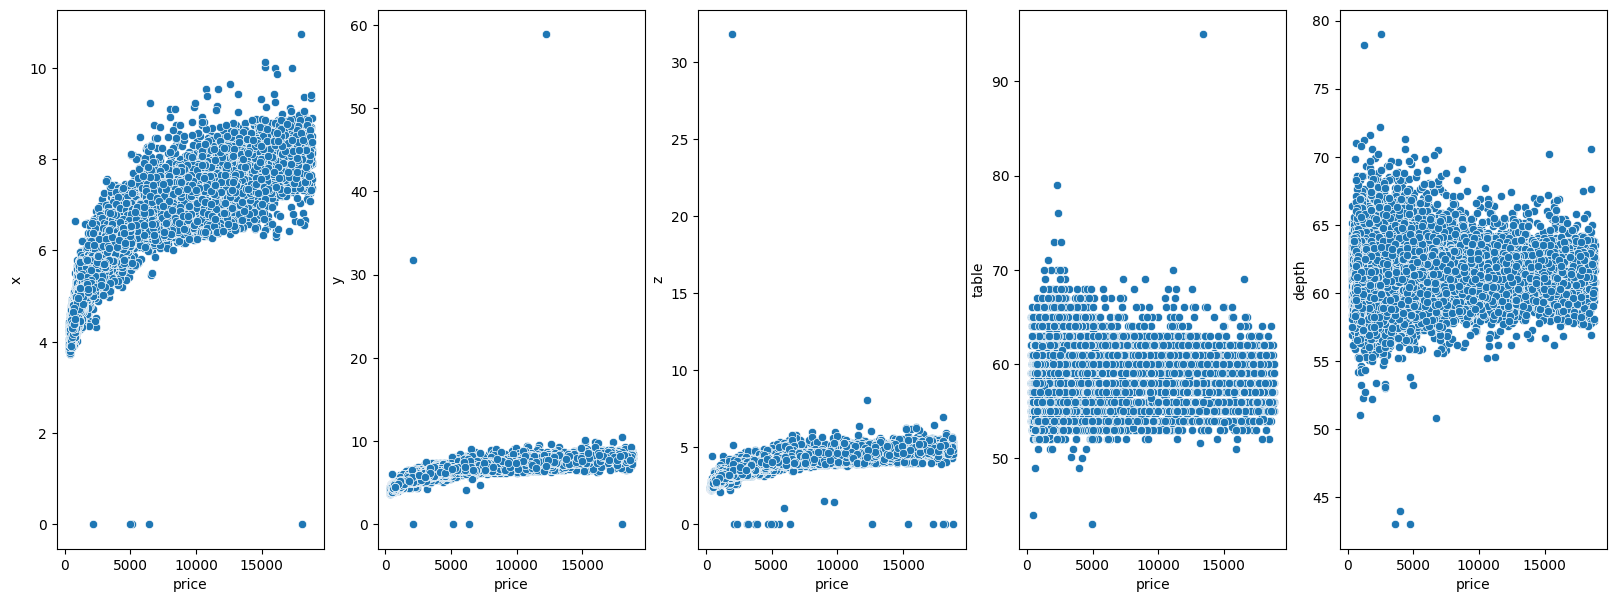

In [26]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = train, x = train['price'], y = train[i], ax = axs[c])
    c+=1

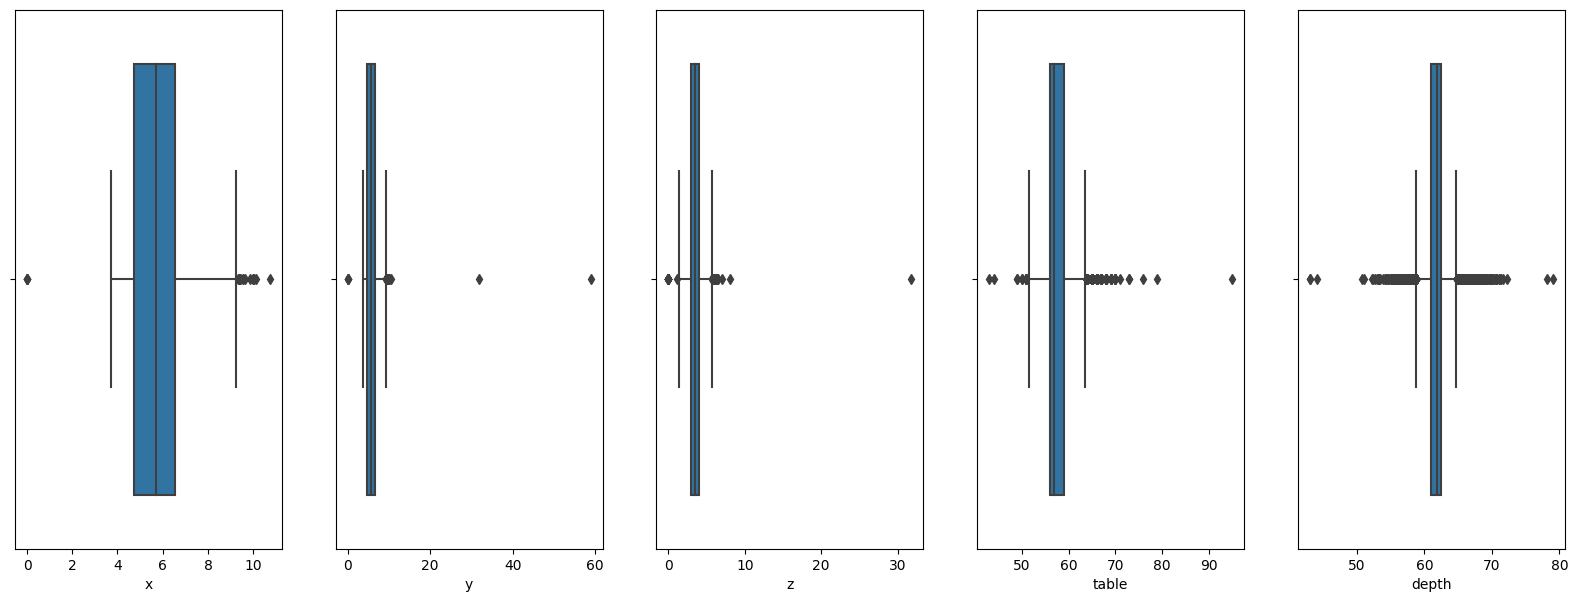

In [27]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.boxplot(data = train, x = train[i], ax = axs[c])
    c+=1

## C- Correlation

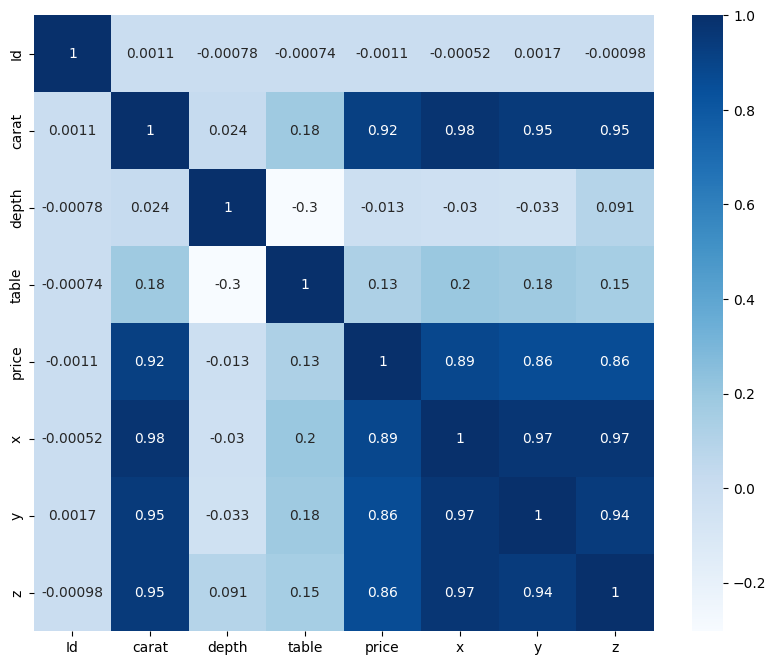

In [28]:
# Select only numeric columns
numeric_columns = train.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_columns.corr()

# Plot heatmap
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.show()


In this heatmap we can see that:


*   carrat is the main feature that is highly corrolated.
*   the depth and the table are weakly corrolated.
*   x, y and z are corrolated to the price.






#### Conclusion
1- Carat is correlated linearly with the price

2- Most diamonds is ideally cut then Premiumly. The higher degree of cut ,The higher the price .

3- Color is important as if the color is D (which is unique ) it increase the price of the diamonds unlike color J ( which is acceptable ) as we can see an Slight yellow tints if we look from Multiple angles

4- Clarity measurement of how clear the diamond is (IF >> didn't Contain impurities to I1 >> Contains impurities visible to the naked eye )

# 3- Prepare the data

## A- Data Cleaning

In [29]:
# Check if the column exists before dropping it
if 'Unnamed: 0' in train.columns:
    train.drop('Unnamed: 0', inplace=True, axis=1)

if 'Unnamed: 0' in test.columns:
    test.drop('Unnamed: 0', inplace=True, axis=1)


In [30]:
# Check the duplicates
train.duplicated().sum() , test.duplicated().sum()

(0, 0)

In [31]:
# Drop Duplicates
train.drop_duplicates(inplace=True)

In [32]:
# Check NaNs
train.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [33]:
# Check NaNs
test.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [34]:
(train == 0).sum(axis=0)

Id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           5
y           4
z          17
dtype: int64

In [35]:
(test == 0).sum(axis=0)

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          3
y          3
z          3
dtype: int64

## B- Handling Outliers

In [36]:
train = train[train['x'] < 9.2]
train = train[train['y'] < 30]
train = train[train['z'] < 30]
train = train[(train['table'] < 75) & (train['table'] > 45)]
train = train[(train['depth'] < 75) & (train['depth'] > 45)]

train.shape

(43120, 11)

In [37]:
train = (train[train.carat < 3])

diamonds that weight is bigger than 3 are small percentage (0.07% of the data ) so we remove them

## C- Handling Text and Categorical Attributes

In [38]:
num_attribs = list(train.dtypes[train.dtypes == 'float64'].index)
categorical_feats = list(train.dtypes[train.dtypes == 'object'].index)

In [39]:
#Changing the the categorical features using OrdinalEncoder()
encoder = OrdinalEncoder()
diamond_cat_encoded = encoder.fit_transform(train[categorical_feats])

diamond_cat_encoded[:10]

array([[2., 5., 3.],
       [3., 3., 7.],
       [2., 2., 5.],
       [2., 3., 5.],
       [3., 4., 7.],
       [4., 3., 1.],
       [4., 2., 4.],
       [2., 2., 2.],
       [2., 0., 4.],
       [4., 3., 6.]])

In [40]:
encoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

- in ordinal encoder the ML algorithms will assume that two nearby values are more similar it will help me but it didn't convert in order as we see above so i decided to use OneHotEncoder, when i use it the model consume more time and power as the onehotencoder increase the number of features to the model.
- i decided to do ordinal encoder but manually so i create cat_enc to do this as we will see.

In [41]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [42]:
# function to do ordinal encoder to categorical features
def cat_enc(data):
  cat_to_enc = {'cut' : ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
              'color' : ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
              'clarity' : ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
  for col,cat in cat_to_enc.items():
    enc_dict = {v:i for i,v in enumerate(cat)}
    data[col].replace(enc_dict,inplace=True)
  return data

In [43]:
train = cat_enc(train)
train.head()

/tmp/ipykernel_24/3232602819.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_24/3232602819.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,4,5,1,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3,3,5,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,4,2,3,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,4,3,3,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3,4,5,61.0,57.0,2596,5.76,5.72,3.50


In [44]:
test = cat_enc(test)
test.head()

/tmp/ipykernel_24/3232602819.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_24/3232602819.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,4,3,5,61.1,57.0,4.52,4.48,2.75
1,2,0.71,3,1,3,62.7,58.0,5.74,5.68,3.58
2,3,0.44,2,5,4,62.8,56.0,4.83,4.88,3.05
3,4,0.81,3,1,1,60.1,59.0,6.09,6.03,3.65
4,5,0.40,4,3,6,61.2,56.0,4.74,4.80,2.92


## D- Attribute Combinations

In [45]:
train['volume'] = train['x'] * train['y'] * train['z']
test['volume'] = test['x'] * test['y'] * test['z']

the column volume which is the product of (x ,y ,z) add feature correlated to the label (price)

## E- Feature Scaling

In [46]:
sc_daimonds = StandardScaler()
train[num_attribs] = sc_daimonds.fit_transform(train[num_attribs])
test[num_attribs] = sc_daimonds.transform(test[num_attribs])

In [47]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.562036,4,5,1,0.037386,-0.205749,4270,0.752323,0.783339,0.771041,176.483340
1,2,1.520867,3,3,5,-0.596172,0.245069,15164,1.477044,1.522407,1.406595,246.965796
2,3,-1.014709,4,2,3,-0.314591,-0.656567,828,-1.162372,-1.190514,-1.193398,52.943373
3,4,-0.567254,4,3,3,-0.384986,-0.656567,1577,-0.482387,-0.460459,-0.500066,86.422842
4,5,-0.205029,3,4,5,-0.525776,-0.205749,2596,0.027602,-0.009807,-0.052290,115.315200


In [48]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z,volume
0,1,-0.972094,4,3,5,-0.455381,-0.205749,-1.081847,-1.127423,-1.135620,55.686400
1,2,-0.183722,3,1,3,0.670943,0.245069,0.009708,-0.045860,0.063265,116.719456
2,3,-0.759020,2,5,4,0.741338,-0.656567,-0.804485,-0.766902,-0.702288,71.889720
3,4,0.029352,3,1,1,-1.159333,0.695887,0.322859,0.269596,0.164376,134.037855
4,5,-0.844250,4,3,6,-0.384986,-0.656567,-0.885009,-0.839006,-0.890065,66.435840


## Correlation After Preparation

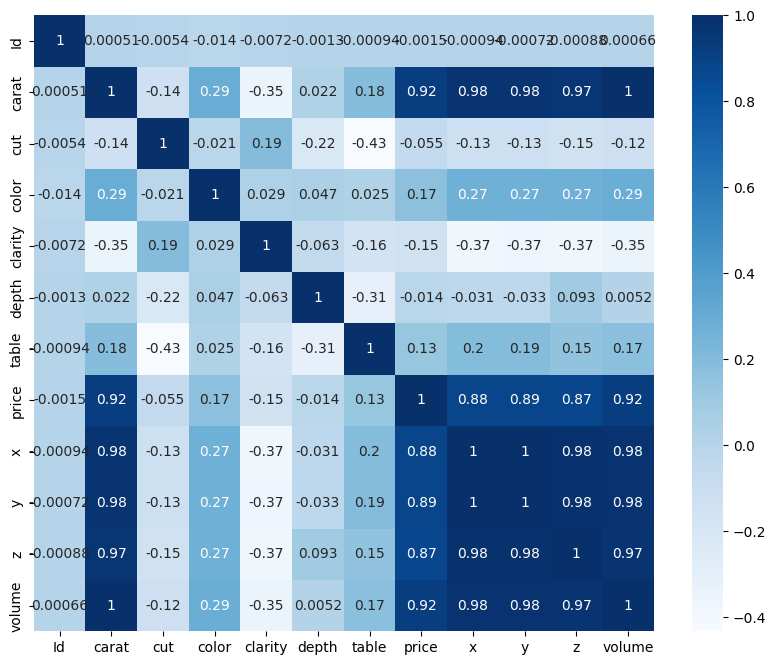

In [49]:
corr_matrix = train.corr()

plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Blues")
plt.show()

- it's clear that Volume is highly correlated to price

***
# 4- Create a Test Set and Train Set
***

In [50]:
train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

In [51]:
X_train = train_set.drop(["price",'Id','x','y','z'], axis=1)
y_train = train_set["price"]
X_test = test_set.drop(["price",'Id','x','y','z'], axis=1)
y_test = test_set["price"]

In [52]:
X_train.head()

,carat,cut,color,clarity,depth,table,volume
13207,-0.396795,4,4,3,0.530152,-1.558203,100.617900
20181,-0.822942,4,1,6,-0.244195,-0.205749,67.314240
28567,-0.844250,2,1,2,1.093314,-0.656567,66.105936
14691,-0.822942,4,3,2,-0.033010,-1.558203,68.055728
37881,0.476807,2,2,3,1.093314,0.695887,164.702720


***
# 5- Modeling
***



5.1- **Linear regression**



In [53]:
#Training Multiple Linear Regression to the Training set
#linear regression model
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [55]:
#claculating error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val   = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE = {rmse_train}, Val RMSE = {rmse_val}')

Train RMSE = 1196.7746247447708, Val RMSE = 1199.085068118703




5.2- **DecisionTreeRegressor**



In [56]:
#DecisionTreeRegressor model
tree_reg = DecisionTreeRegressor(max_depth=11, min_samples_split=5, min_samples_leaf=1, random_state=20)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, min_samples_split=5, random_state=20)

In [57]:
y_pred_train = tree_reg.predict(X_train)
y_pred_test = tree_reg.predict(X_test)

In [58]:
#claculating error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val   = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE = {rmse_train}, Val RMSE = {rmse_val}')

Train RMSE = 477.6422940688286, Val RMSE = 591.9949309638563


5.3- **RandomForestRegressor**

In [59]:
#RandomForestRegressor Model
forest_reg = RandomForestRegressor(n_estimators=50, max_depth=16, max_features=8, min_samples_split=2, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, max_features=8, n_estimators=50,
                      random_state=42)

In [60]:
y_pred_train = forest_reg.predict(X_train)
y_pred_test = forest_reg.predict(X_test)

In [61]:
#claculating error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val   = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE = {rmse_train}, Val RMSE = {rmse_val}')

Train RMSE = 257.4350873244508, Val RMSE = 526.0322972799362




5.4- **LGBMRegressor**



In [62]:
lgbm_model = LGBMRegressor(num_leaves=20, max_depth=14, learning_rate=0.01, n_estimators=3000)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 34489, number of used features: 7
[LightGBM] [Info] Start training from score 3933.866363


LGBMRegressor(learning_rate=0.01, max_depth=14, n_estimators=3000,
              num_leaves=20)

In [63]:
y_pred_train = lgbm_model.predict(X_train)
y_pred_test = lgbm_model.predict(X_test)

In [64]:
#claculating error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val   = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE = {rmse_train}, Val RMSE = {rmse_val}')

Train RMSE = 443.5083640945313, Val RMSE = 512.1095066668713




5.5- **XGBRegressor**



In [65]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

In [67]:
#claculating error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val   = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE = {rmse_train}, Val RMSE = {rmse_val}')

Train RMSE = 391.41645919820684, Val RMSE = 526.4195912461565




5.6- **GradientBoostingRegressor**



In [68]:
gradient_model = GradientBoostingRegressor()
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [69]:
y_pred_train = gradient_model.predict(X_train)
y_pred_test = gradient_model.predict(X_test)

In [70]:
#claculating error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val   = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE = {rmse_train}, Val RMSE = {rmse_val}')

Train RMSE = 603.6866279028507, Val RMSE = 598.0994445122938




5.7- **StackingRegressor**



In [71]:
estimators = [('dt1', DecisionTreeRegressor())]
stack_model = StackingRegressor(estimators=estimators, final_estimator=DecisionTreeRegressor())

In [72]:
stack_model.fit(X_train, y_train)

StackingRegressor(estimators=[('dt1', DecisionTreeRegressor())],
                  final_estimator=DecisionTreeRegressor())

In [73]:
y_pred_train = stack_model.predict(X_train)#claculating error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val   = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE = {rmse_train}, Val RMSE = {rmse_val}')
y_pred_test = stack_model.predict(X_test)

Train RMSE = 612.5339577617207, Val RMSE = 598.0994445122938




5.8- **VotingRegressor**



In [74]:
estimators = [('lgbm1', LGBMRegressor(num_leaves=20, max_depth=14, learning_rate=0.01, n_estimators=3000)),
              ('lgbm2', LGBMRegressor(num_leaves=20, max_depth=14, learning_rate=0.01, n_estimators=3000)),
              ('lgbm3', LGBMRegressor(num_leaves=20, max_depth=14, learning_rate=0.01, n_estimators=3000)),
              ('rf', RandomForestRegressor(n_estimators=50, max_depth=16, max_features=8, min_samples_split=2, random_state=42))]

voting_model = VotingRegressor(estimators=estimators)

In [75]:
voting_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 34489, number of used features: 7
[LightGBM] [Info] Start training from score 3933.866363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 34489, number of used features: 7
[LightGBM] [Info] Start training from score 3933.866363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 34489, number of used features: 7
[LightGBM] [Info] Start tra

VotingRegressor(estimators=[('lgbm1',
                             LGBMRegressor(learning_rate=0.01, max_depth=14,
                                           n_estimators=3000, num_leaves=20)),
                            ('lgbm2',
                             LGBMRegressor(learning_rate=0.01, max_depth=14,
                                           n_estimators=3000, num_leaves=20)),
                            ('lgbm3',
                             LGBMRegressor(learning_rate=0.01, max_depth=14,
                                           n_estimators=3000, num_leaves=20)),
                            ('rf',
                             RandomForestRegressor(max_depth=16, max_features=8,
                                                   n_estimators=50,
                                                   random_state=42))])

In [76]:
y_pred_train = voting_model.predict(X_train)
y_pred_test = voting_model.predict(X_test)

In [77]:
#claculating error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val   = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE = {rmse_train}, Val RMSE = {rmse_val}')

Train RMSE = 389.4308989572192, Val RMSE = 504.6409314329646


# 6. Fine Tuning the Model

as we can see that the highest two defult models is RandomForest and LGBMRegressor so we trying to fine tuning them using Grid Search

- RandomForest

In [78]:
param_grid = [
 {'n_estimators': [50], 'max_depth': [6, 8,10],'min_samples_split' : [2] ,
  'max_features' : [6,8],'random_state' : [42]},
 ]

In [79]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [6, 8, 10], 'max_features': [6, 8],
                          'min_samples_split': [2], 'n_estimators': [50],
                          'random_state': [42]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
grid_search.best_params_


{'max_depth': 10,
 'max_features': 6,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 42}

In [81]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

768.7506735632164 {'max_depth': 6, 'max_features': 6, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
776.8294572679357 {'max_depth': 6, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
622.9965460069225 {'max_depth': 8, 'max_features': 6, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
622.9407636903549 {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
572.2513116693495 {'max_depth': 10, 'max_features': 6, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
572.9692975619014 {'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}


- LGBMRegressor

In [82]:
param_grid = [
 {'num_leaves': [18, 20], 'max_depth': [12, 14],'learning_rate' : [0.01] ,
  'n_estimators' : [3000]},
 ]

In [83]:
lgbm_model = LGBMRegressor()
grid_search = GridSearchCV(lgbm_model, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 27591, number of used features: 7
[LightGBM] [Info] Start training from score 3941.593563
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 27591, number of used features: 7
[LightGBM] [Info] Start training from score 3929.982748
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 27591, number of used features: 7
[LightGBM] [Info] Start tra

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid=[{'learning_rate': [0.01], 'max_depth': [12, 14],
                          'n_estimators': [3000], 'num_leaves': [18, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [84]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 14,
 'n_estimators': 3000,
 'num_leaves': 20}

In [85]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

537.5386032666028 {'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 3000, 'num_leaves': 18}
536.9756690529791 {'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 3000, 'num_leaves': 20}
537.6823936176729 {'learning_rate': 0.01, 'max_depth': 14, 'n_estimators': 3000, 'num_leaves': 18}
536.8998715372144 {'learning_rate': 0.01, 'max_depth': 14, 'n_estimators': 3000, 'num_leaves': 20}


# 7. Best-Models

- use the best models to train on the full-train-data then predict the test

In [86]:
X_train = train.drop(["price","Id",'x','y','z'], axis=1)
y_train = train["price"]
X_test = test.drop(["Id","x","y","z"],axis=1)

In [87]:
X_test.head()

,carat,cut,color,clarity,depth,table,volume
0,-0.972094,4,3,5,-0.455381,-0.205749,55.686400
1,-0.183722,3,1,3,0.670943,0.245069,116.719456
2,-0.759020,2,5,4,0.741338,-0.656567,71.889720
3,0.029352,3,1,1,-1.159333,0.695887,134.037855
4,-0.844250,4,3,6,-0.384986,-0.656567,66.435840




1- RandomForestRegressor



In [88]:
#RandomForestRegressor Model
forest_reg = RandomForestRegressor(n_estimators=50, max_depth=10, max_features=6, min_samples_split=2, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=6, n_estimators=50,
                      random_state=42)

In [89]:
random_y_pred_test = forest_reg.predict(X_test)

2- LGBMRegressor

In [90]:
#LGBMRegressor Model
lgbm_model = LGBMRegressor(num_leaves=20, max_depth=14, learning_rate=0.01, n_estimators=3000)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 43112, number of used features: 7
[LightGBM] [Info] Start training from score 3922.979055


LGBMRegressor(learning_rate=0.01, max_depth=14, n_estimators=3000,
              num_leaves=20)

In [91]:
lgbm_y_pred_test = lgbm_model.predict(X_test)



3- VotingRegressor



In [92]:
estimators = [('lgbm1', LGBMRegressor(num_leaves=20, max_depth=14, learning_rate=0.01, n_estimators=3000)),
              ('lgbm2', LGBMRegressor(num_leaves=20, max_depth=14, learning_rate=0.01, n_estimators=3000)),
              ('lgbm3', LGBMRegressor(num_leaves=20, max_depth=14, learning_rate=0.01, n_estimators=3000)),
              ('rf', RandomForestRegressor(n_estimators=50, max_depth=16, max_features=8, min_samples_split=2, random_state=42))]

voting_model = VotingRegressor(estimators=estimators)

In [93]:
voting_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 43112, number of used features: 7
[LightGBM] [Info] Start training from score 3922.979055
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 43112, number of used features: 7
[LightGBM] [Info] Start training from score 3922.979055
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 43112, number of used features: 7
[LightGBM] [Info] Start tra

VotingRegressor(estimators=[('lgbm1',
                             LGBMRegressor(learning_rate=0.01, max_depth=14,
                                           n_estimators=3000, num_leaves=20)),
                            ('lgbm2',
                             LGBMRegressor(learning_rate=0.01, max_depth=14,
                                           n_estimators=3000, num_leaves=20)),
                            ('lgbm3',
                             LGBMRegressor(learning_rate=0.01, max_depth=14,
                                           n_estimators=3000, num_leaves=20)),
                            ('rf',
                             RandomForestRegressor(max_depth=16, max_features=8,
                                                   n_estimators=50,
                                                   random_state=42))])

In [94]:
voting_y_pred_test = voting_model.predict(X_test)

In [95]:
model_list=[forest_reg,lgbm_model,voting_model]
for i,model in enumerate(model_list):
    csv_name=f"sub{i}-1.csv"
    prediction=model.predict(X_test)
    data={'Id':test['Id'],'price':prediction}
    df=pd.DataFrame(data)
    df.to_csv(csv_name,index=False)
    print(f"{csv_name} saved ")

sub0-1.csv saved 
sub1-1.csv saved 
sub2-1.csv saved 


In [96]:
df.head()

,Id,price
0,1,824.634328
1,2,2961.202439
2,3,845.568869
3,4,2808.745187
4,5,1135.867273
